In [5]:
import pandas as pd


transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Cheese', 'Eggs', 'Bread'],
    ['Milk', 'Eggs'],
    ['Bread', 'Butter', 'Beer'],
    ['Milk', 'Cheese', 'Wine'],
    ['Bread', 'Butter', 'Cheese', 'Wine'],
    ['Eggs', 'Beer'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
]


def create_dataset(transactions):
    rows = []
    for i, transaction in enumerate(transactions):
        for item in transaction:
            rows.append({'Transaction': i + 1, 'Item': item})
    return pd.DataFrame(rows)


df = create_dataset(transactions)
print("Generated Dataset:")
df.head()

Generated Dataset:


,Transaction,Item
0,1,Milk
1,1,Bread
2,1,Butter
3,2,Cheese
4,2,Eggs


In [6]:
from mlxtend.preprocessing import TransactionEncoder


transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

# One-hot encode the data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print("One-Hot Encoded DataFrame:")
print(df_encoded)


One-Hot Encoded DataFrame:
    Beer  Bread  Butter  Cheese   Eggs   Milk   Wine
0  False   True    True   False  False   True  False
1  False   True   False    True   True  False  False
2  False  False   False   False   True   True  False
3   True   True    True   False  False  False  False
4  False  False   False    True  False   True   True
5  False   True    True    True  False  False   True
6   True  False   False   False   True  False  False
7  False   True    True   False   True   True  False


In [7]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
    support               itemsets
0     0.250                 (Beer)
1     0.625                (Bread)
2     0.500               (Butter)
3     0.375               (Cheese)
4     0.500                 (Eggs)
5     0.500                 (Milk)
6     0.250                 (Wine)
7     0.500        (Bread, Butter)
8     0.250        (Bread, Cheese)
9     0.250          (Bread, Eggs)
10    0.250          (Bread, Milk)
11    0.250         (Butter, Milk)
12    0.250         (Cheese, Wine)
13    0.250           (Eggs, Milk)
14    0.250  (Bread, Milk, Butter)


In [8]:
from mlxtend.frequent_patterns import association_rules


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,num_itemsets=2)

print("Association Rules:")
rules.head()


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bread),(Butter),0.625,0.500,0.50,0.800000,1.600000,1.0,0.187500,2.500,1.000000,0.800000,0.600000,0.900000
1,(Butter),(Bread),0.500,0.625,0.50,1.000000,1.600000,1.0,0.187500,inf,0.750000,0.800000,1.000000,0.900000
2,(Cheese),(Bread),0.375,0.625,0.25,0.666667,1.066667,1.0,0.015625,1.125,0.100000,0.333333,0.111111,0.533333
3,(Eggs),(Bread),0.500,0.625,0.25,0.500000,0.800000,1.0,-0.062500,0.750,-0.333333,0.285714,-0.333333,0.450000
4,(Milk),(Bread),0.500,0.625,0.25,0.500000,0.800000,1.0,-0.062500,0.750,-0.333333,0.285714,-0.333333,0.450000


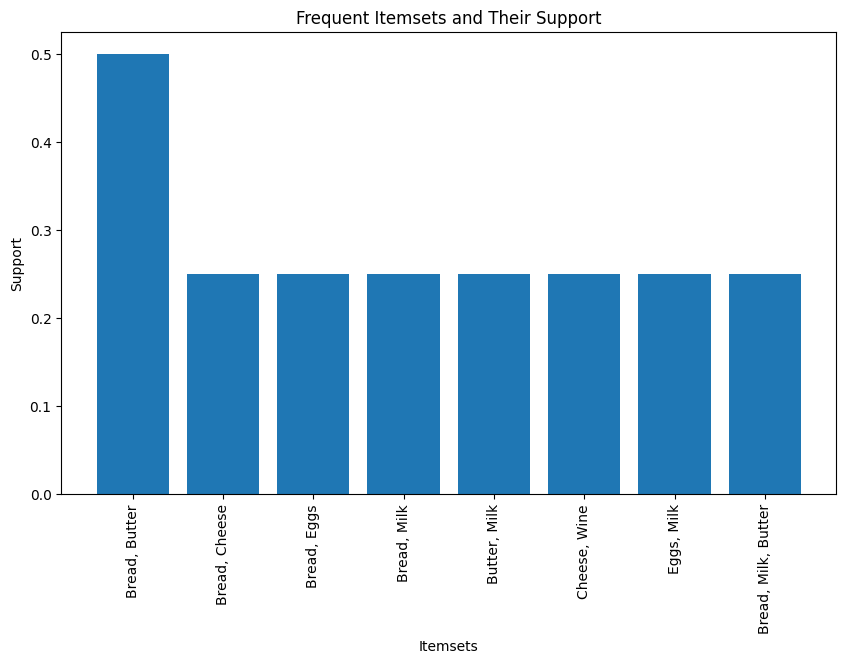

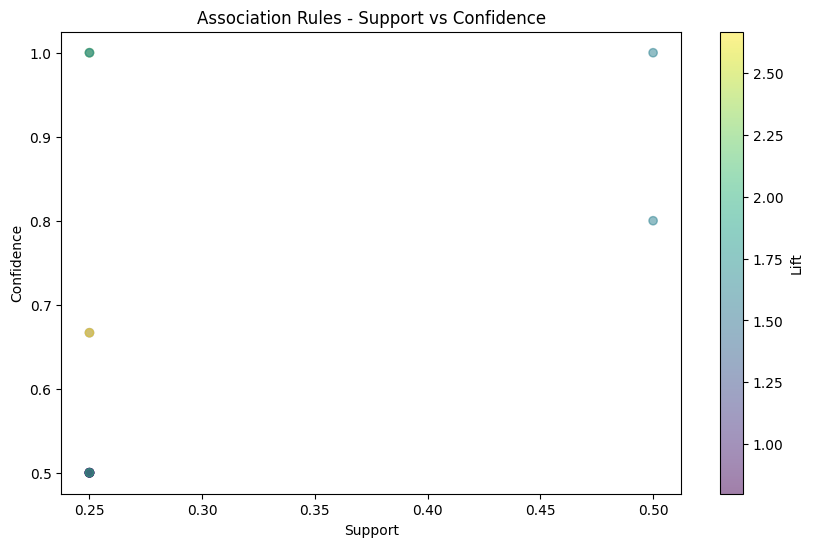

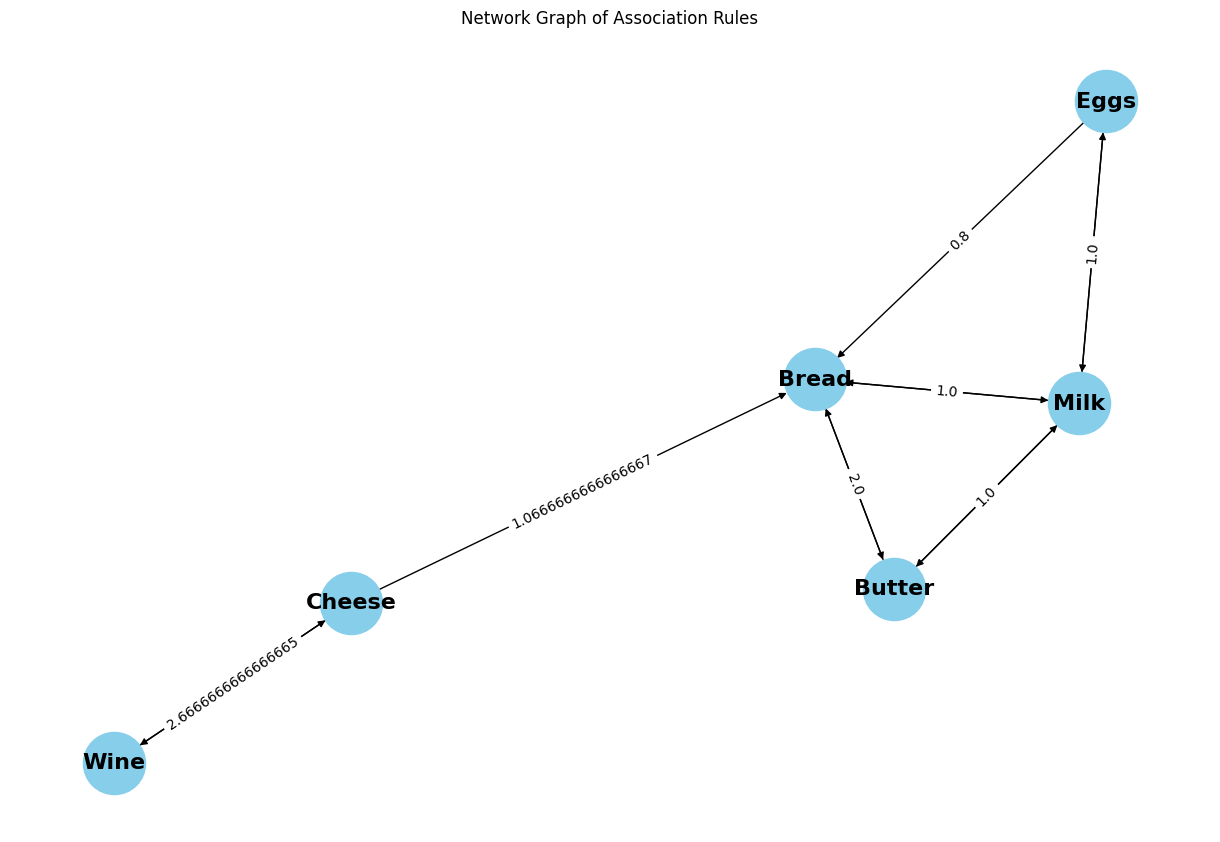

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] > 1]

plt.bar(frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))), frequent_itemsets['support'])
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets and Their Support')
plt.xticks(rotation=90)
plt.show()

# Scatter Plot for Association Rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Support vs Confidence')
plt.show()

import networkx as nx

G = nx.DiGraph()
for _, rule in rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=16, font_color='black', font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Network Graph of Association Rules')
plt.show()
